In [1]:
!pip install -qq google-play-scraper

In [9]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [15]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [16]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 14/14 [00:04<00:00,  2.92it/s]


In [18]:
def print_json(json_object):
    json_str = json.dumps(json_object, indent=2, sort_keys=True,
                         default=str)
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [19]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "<b>\ud83c\udfc6 Editor's Choice by Google</b>\r\n\r\nAny.do is a To Do List, Calendar, Planner, Tasks & Reminders App That Helps Over 25M People Stay Organized and Get More Done.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY, WSJ).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\n\ud83d\udcc5 Organize Your Tasks & To-Do List in Seconds\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar vi

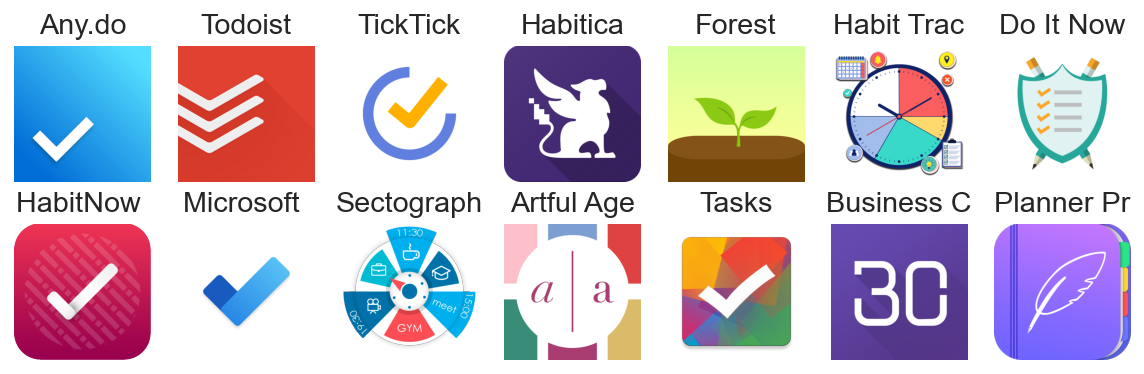

In [22]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]
        

fig, axs = plt.subplots(2, len(app_infos)//2, figsize=(10,3))
for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [24]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(n=2)

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Any.do: To do list, Calendar, Planner & Reminders",<b>🏆 Editor's Choice by Google</b>\r\n\r\nAny....,<b>🏆 Editor&#39;s Choice by Google</b><br><br>...,Task Manager ✅ Organizer 📅 Agenda 📝 Daily Remi...,Task Manager ✅ Organizer 📅 Agenda 📝 Daily Remi...,"10,000,000+",10000000,4.383048,351133,124707,...,None,None,None,"Nov 10, 2011",1595836658,Varies with device,- New and stunning reminders design (upgraded ...,- New and stunning reminders design (upgraded ...,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2019 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2019 Editor&#39;s Choice</b> by Google<br...,"""The best to-do list"" — The Verge. Tasks ✅ Rem...",&quot;The best to-do list&quot; — The Verge. T...,"10,000,000+",10000000,4.558021,205413,62710,...,None,None,None,"Nov 18, 2012",1595496001,Varies with device,"⚙️️ To keep things simpler, section names can ...","⚙️️ To keep things simpler, section names can ...",com.todoist,https://play.google.com/store/apps/details?id=...


In [25]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

# Get App Reviews

In [30]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in range(1,6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,
                # scores of 1/2 are negative, scores of 3 are neutral
                # and scores of 4/5 are positive => need to balance class
                count=200 if score==3 else 100,
                filter_score_with=score
            )[0]
        
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap

            app_reviews.extend(rvs)
        

100%|██████████| 14/14 [01:39<00:00,  7.14s/it]


In [31]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2020-07-22 00:17:25",
  "content": "Trash. Yes, it has some nice nifty features but it lacks in complete necessities to actually plan your day. You can make a task, perfectly include subtasks and then add a nice color to the task. But no yellow, because that's already the fixed color of the 'priority label'. Reminders are great, except you can only have one. If I want to have a reminder on Wednesday 10AM and a reminder on Friday 6PM, I'd need a different app. Because this app only allows you to set 1 reminder. Frustrating. 0/10",
  "repliedAt": "2020-07-23 17:57:51",
  "replyContent": "Premium users can edit, create and delete tags (support.any.do/color-tags/). You can set Recurring Reminders for free, to get multiple reminders for any task, by preset intervals (support.any.do/recurring-reminders/). To set random reminders as mentioned, you can create 2 separate tasks. For questions, contact us at - www.any.do/contact_form",
  "reviewCreatedVersion": 

In [32]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(14878, 12)

In [33]:
app_reviews_df.head(n=2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://lh3.googleusercontent.com/-pO3wTIb4myA...,"Trash. Yes, it has some nice nifty features bu...",1,25,5.2.0.23,2020-07-22 00:17:25,"Premium users can edit, create and delete tags...",2020-07-23 17:57:51,most_relevant,com.anydo
1,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,8,5.2.0.23,2020-07-22 09:23:35,The Premium ad only shows up when first openin...,2020-07-23 18:20:43,most_relevant,com.anydo


In [34]:
app_reviews_df.to_csv("reviews.csv", index=None, header=True)